In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os


### Import data
1. build company list
2. read share price of company from csv


In [427]:
def read_company_list(path):
    company_list = []
    f=open(path,"r", encoding = 'utf-8',errors='ignore')
    for line in f:
        #print(line)
        #print(line.split("\t"))
        company_list.append(line.split('\t')[0])
    
    return company_list
    
    
    

In [453]:
def Read_data(folderName, CompanyNameList):
    ###   Read Data from given file reflect to industry and company
    ###   make date become  for searching
    df = [0] * len(CompanyNameList)
    for i in range(len(CompanyNameList)):
        df[i] = pd.read_csv(f"~/Documents/GitHub/MAST90106/data/{folderName}/{CompanyNameList[i]}.csv")
        #df_ts = set_date_timeseries(df[i])
        
    return df

### Calculate indicator
1. calculate average share price, inlcuding calculate return of share price
2. calculate return on share price

In [347]:
def average_share_price(df):
    ### Return share price based on month and year in DataFrame
    y = df.iloc[0,]["Date"][0:4]
    year = int(y)
    
    # make date into timeseries for use, with diff file
    df_ts = set_date_timeseries(df)
    
    month_average = {}
    year_average = {}
    
    # calculate average price in monthly
    while year < 2021:
        #print(year)
        for i in range(1,13):
            try:
                #print(i)
                ave_m = df_ts[f'{year}-{i}'].mean()
                #print(ave_m)
                month_average[f"{year}-{i}"] = ave_m["Adj Close"]
                #print(month_average)
                
            except:
                pass
    
    # calculate average price in yearly
        ave_y = df_ts[f'{year}'].mean()
        year_average[f"{year}"] = ave_y["Adj Close"]
        year += 1
    
    # create month base data and add return of month price into df
    df_month  = pd.DataFrame(month_average.items(), columns = ["Date", "average_price"])
    df_m = calculate_price_return(df_month)
    
    # create year base data and add return of year price into df
    df_year = pd.DataFrame(year_average.items(), columns = ["Date", "average_price"])
    df_y = calculate_price_return(df_year)
    
    
    df_ts_m = set_month_timeseries(df_m)
    #df_ts_m.drop(["Date"], axis = 1, inplace = True)
    #df_month.drop(["Year - Month"], axis = 1, inplace = True)
    
    df_ts_y = set_year_timeseries(df_y)
    #df_ts_y.drop(["Date"], axis = 1, inplace = True)
    #df_year.drop(["Year"], axis = 1, inplace = True)
    
    return df_m, df_y, df_ts, df_ts_m, df_ts_y




In [402]:
root_path = os.path.abspath(os.path.dirname(os.getcwd()))
data_path = os.path.join(root_path, 'data')

In [341]:
def set_date_timeseries(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df_ts = df.set_index("Date", inplace = False)
    return df_ts


In [355]:
def set_month_timeseries(df):
    df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m")
    #df['Year - Month'] = df['Date'].map(lambda x: 1000*x.year + x.month)
    df_ts = df.set_index("Date", inplace = False)
    return df_ts




In [343]:
def set_year_timeseries(df):
    df['Date'] = pd.to_datetime(df['Date'], format = "%Y")
    #df['Year'] = df['Date'].dt.year
    df_ts = df.set_index("Date", inplace = False)
    return df_ts


In [217]:
def calculate_price_return(df):
    ### add new colunm with return of price
    
    
    return_list = []
    for i in range(len(df["average_price"])):
        if i == 0:
            return_list.append(0)
        else:
            r = (df["average_price"][i] - df["average_price"][i - 1]) / df["average_price"][i - 1]
            return_list.append(r)
    df["return"] = return_list
    df.drop([0], axis = 0, inplace = True)
    return df



In [303]:
def process_company_data(df, fileName):
    DF = []
    df_m, df_y, df_ts, df_ts_m, df_ts_y = average_share_price(df)
    DF.append(df)
    DF.append(df_ts)
    DF.append(df_m)
    DF.append(df_ts_m)
    DF.append(df_y)
    DF.append(df_ts_y)
    
    DF[3].to_csv(f"{fileName}_month.csv", index_label = "Date")
    DF[5].to_csv(f"{fileName}_year.csv", index_label = "Date")
    return DF


In [327]:
def plot_return_data(x, des):
    plt.plot(x["return"])
    plt.xlabel("Timeline")
    plt.ylabel(des)
    plt.title(f"{des} VS time")
    plt.show()
    

In [328]:
def plot_ave_data(x, des):
    plt.plot(x["average_price"])
    plt.xlabel("Timeline")
    plt.ylabel(des)
    plt.title(f"{des} VS time")
    plt.show()
    

In [330]:
def plot_all(x):
    plot_return_data(x, "return")
    plot_ave_data(x, "average share price")

In [ ]:
### calculate data by time "M" month, "Y" year
# df.resample("M").mean()

In [473]:
def index_generator(DF_list, C):
    ### generate average return of industry index
    ### C indicate type of return, "M": monthly, "Y":yearly
    tem_list = []
    for i in range(len(DF_list)):
        if C == "M":
            tem_list.append(DF_list[i][3])
        if C == "Y":
            tem_list.append(DF_list[i][5])

    t = pd.concat(tem_list)
    index_return = t.resample(C).mean()
    return index_return

In [486]:
def PROCESS_INDUSTRY(industry: str):
    company_list = read_company_list(os.path.join(data_path, f'{industry}.txt'))
    dfIND_list = Read_data(f"{industry}", company_list)
    
#     dfIND_month = [0] * len(dfAGR_list)
#     dfIND_year = [0] * len(dfAGR_list)
#     dfIND_ts = [0] * len(dfAGR_list)
#     dfIND_ts_month = [0] * len(dfAGR_list)
#     dfIND_ts_year = [0] * len(dfAGR_list)
#     for i in range(len(dfAGR_list)):
#         dfIND_month[i], dfIND_year[i], dfIND_ts[i], dfIND_ts_month[i], dfIND_ts_year[i] = average_share_price(dfAGR_list[i])
    DF = [0] * len(dfAGR_list)
    for i in range(len(dfAGR_list)):
        DF[i] = process_company_data(dfAGR_list[i], company_list[i])
     
    industry_index_m = index_generator(DF,"M")
    industry_index_y = index_generator(DF,"Y")
    industry_index_m.to_csv(f"{industry}_index_month.csv", index_label = "Date")
    industry_index_y.to_csv(f"{industry}_index_year.csv", index_label = "Date")
        

In [428]:
company_list = read_company_list(os.path.join(data_path, 'agriculture.txt'))
company_list 


['CTA-PB',
 'CTA-PA',
 'CTVA',
 'NTR',
 'FMC',
 'MOS',
 'SMG',
 'CF',
 'ICL',
 'MGPI',
 'UAN',
 'AVD',
 'IPI',
 'MBII',
 'SEED',
 'CGA',
 'RKDA',
 'YTEN']

In [461]:
dfAGR_list = Read_data("agriculture", company_list)
dfAGR_list
#dfAGR_list_ts

[             Date        High         Low        Open       Close  Volume  \
 0      1973-02-21   69.375000   69.375000   69.375000   69.375000   300.0   
 1      1973-02-23   69.750000   69.750000   69.750000   69.750000   400.0   
 2      1973-02-26   69.125000   69.125000   69.125000   69.125000   800.0   
 3      1973-02-27   69.000000   69.000000   69.000000   69.000000   400.0   
 4      1973-03-01   69.250000   69.250000   69.250000   69.250000  1300.0   
 ...           ...         ...         ...         ...         ...     ...   
 10973  2020-12-24  113.720001  113.720001  113.720001  113.720001   179.0   
 10974  2020-12-28  114.980003  114.059998  114.059998  114.980003   932.0   
 10975  2020-12-29  114.999901  112.200104  114.999901  112.200104   225.0   
 10976  2020-12-30  115.000000  113.260002  113.260002  115.000000  1406.0   
 10977  2020-12-31  115.750000  113.449997  113.449997  115.750000   815.0   
 
         Adj Close  
 0       13.742791  
 1       13.817073  

In [462]:
DF = [0] * len(dfAGR_list)
for i in range(len(dfAGR_list)):
    DF[i] = process_company_data(dfAGR_list[i], company_list[i])


In [487]:
    industry_index_m = index_generator(DF,"M")
    industry_index_y = index_generator(DF,"Y")
    industry_index_m.to_csv(f"agriculture_index_month.csv", index_label = "Date")
    industry_index_y.to_csv(f"agriculture_index_year.csv", index_label = "Date")

In [485]:
industry_index_m

,average_price,return
Date,,
1973-03-31,13.501031,-0.006568
1973-04-30,13.370847,-0.009643
1973-05-31,13.340615,-0.002194
1973-06-30,13.290986,-0.003726
1973-07-31,13.006200,-0.021422
...,...,...
2020-08-31,36.781754,0.077982
2020-09-30,36.704115,-0.022250
2020-10-31,37.253198,0.020935


In [468]:

DF[0][3]

,average_price,return
Date,,
1973-03-01,13.591963,-0.010083
1973-04-01,13.462587,-0.009519
1973-05-01,13.301576,-0.011960
1973-06-01,13.227505,-0.005569
1973-07-01,12.957481,-0.020414
...,...,...
2020-08-01,103.002802,0.047695
2020-09-01,103.112657,0.001067
2020-10-01,105.730903,0.025392


In [458]:
# dfIND_month = [0] * len(dfAGR_list)
# dfIND_year = [0] * len(dfAGR_list)
# dfIND_ts = [0] * len(dfAGR_list)
# dfIND_ts_month = [0] * len(dfAGR_list)
# dfIND_ts_year = [0] * len(dfAGR_list)
# for i in range(len(dfAGR_list)):
#     dfIND_month[i], dfIND_year[i], dfIND_ts[i], dfIND_ts_month[i], dfIND_ts_year[i] = average_share_price(dfAGR_list[i])

    

In [459]:
dfIND_month

[          Date  average_price    return
 1   1973-03-01      13.591963 -0.010083
 2   1973-04-01      13.462587 -0.009519
 3   1973-05-01      13.301576 -0.011960
 4   1973-06-01      13.227505 -0.005569
 5   1973-07-01      12.957481 -0.020414
 ..         ...            ...       ...
 570 2020-08-01     103.002802  0.047695
 571 2020-09-01     103.112657  0.001067
 572 2020-10-01     105.730903  0.025392
 573 2020-11-01     108.945368  0.030402
 574 2020-12-01     111.572511  0.024114
 
 [574 rows x 3 columns],           Date  average_price    return
 1   1973-03-01      13.410100 -0.003052
 2   1973-04-01      13.279107 -0.009768
 3   1973-05-01      13.379654  0.007572
 4   1973-06-01      13.354467 -0.001882
 5   1973-07-01      13.054919 -0.022431
 ..         ...            ...       ...
 570 2020-08-01      81.839432  0.050441
 571 2020-09-01      82.270207  0.005264
 572 2020-10-01      83.543942  0.015482
 573 2020-11-01      84.753883  0.014483
 574 2020-12-01      86.086069 

In [382]:
df1 = pd.read_csv("~/Documents/GitHub/MAST90106/data/agriculture/YTEN.csv")
df1


,Date,High,Low,Open,Close,Volume,Adj Close
0,2006-11-10,39000.00,33816.00,34200.00,37248.00,1796.0,37248.00
1,2006-11-13,39840.00,37632.00,37632.00,38376.00,316.0,38376.00
2,2006-11-14,39096.00,35520.00,39096.00,36600.00,113.0,36600.00
3,2006-11-15,38400.00,36000.00,36936.00,38400.00,84.0,38400.00
4,2006-11-16,44688.00,38640.00,38664.00,43800.00,141.0,43800.00
...,...,...,...,...,...,...,...
3554,2020-12-24,6.12,5.84,6.12,5.93,26400.0,5.93
3555,2020-12-28,6.02,5.71,6.02,5.83,43000.0,5.83
3556,2020-12-29,6.10,5.54,5.85,5.76,36300.0,5.76
3557,2020-12-30,5.87,5.72,5.84,5.84,24200.0,5.84


In [386]:
dfm, dfy, dfts, dftsm, dftsy = average_share_price(df1)

In [353]:
dftsm

,average_price,return
Date,,
2006-12-01,43687.200000,0.092664
2007-01-01,40216.800000,-0.079437
2007-02-01,42425.684211,0.054924
2007-03-01,41146.909091,-0.030142
2007-04-01,46262.400000,0.124323
...,...,...
2020-08-01,5.470952,-0.128703
2020-09-01,6.691429,0.223083
2020-10-01,6.540454,-0.022562


In [354]:
dfm

,Date,average_price,return
1,2006-12-01,43687.200000,0.092664
2,2007-01-01,40216.800000,-0.079437
3,2007-02-01,42425.684211,0.054924
4,2007-03-01,41146.909091,-0.030142
5,2007-04-01,46262.400000,0.124323
...,...,...,...
165,2020-08-01,5.470952,-0.128703
166,2020-09-01,6.691429,0.223083
167,2020-10-01,6.540454,-0.022562
168,2020-11-01,6.146000,-0.060310


In [474]:
l = []

In [476]:
l.append(dftsm)
l.append(dftsm)

In [478]:

pd.concat(l)

,average_price,return
Date,,
2006-12-01,43687.200000,0.092664
2007-01-01,40216.800000,-0.079437
2007-02-01,42425.684211,0.054924
2007-03-01,41146.909091,-0.030142
2007-04-01,46262.400000,0.124323
...,...,...
2020-08-01,5.470952,-0.128703
2020-09-01,6.691429,0.223083
2020-10-01,6.540454,-0.022562


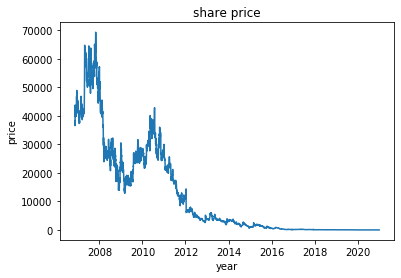

In [324]:
plt.plot(dfts["Close"])
plt.xlabel("year")
plt.ylabel("price")
plt.title(f"share price")
plt.show()


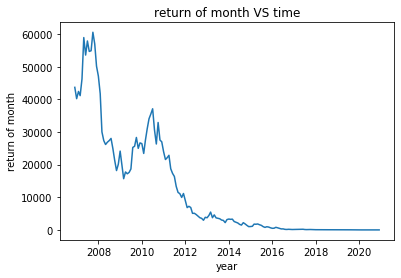

In [326]:
plot_data(dftsm["average_price"], "return of month")




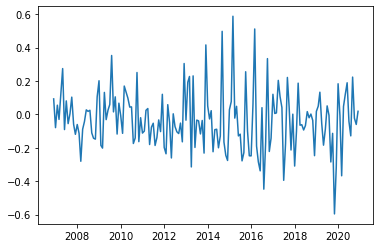

In [318]:
plt.plot(dftsm["return"])






In [469]:
l = [2,3,4,5]

In [470]:
pd.DataFrame(l)

,0
0,2
1,3
2,4
3,5
